In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

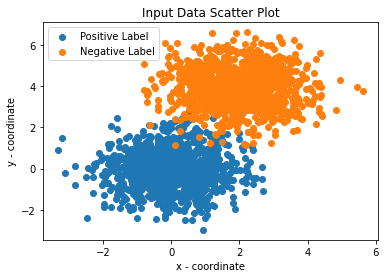

In [9]:
# Let us first create our input Data. We look to having 2 features (x and y co-ordinate) and 2 labels: 0 and 1 
np.random.seed(10)
num_observations = 1000

# Create a 2-dimensional Gaussian Distribution. We make 2 distributions, one for each label.
mean1 = (0, 0) # Mean of first distribution
mean2 = (2, 4) # Mean of second distribution
cov = [[1, 0], [0, 1]] # Co-variance of both distributions
data1=[]
x1, y1 = np.random.multivariate_normal(mean1, cov, num_observations).T
x2, y2 = np.random.multivariate_normal(mean2, cov, num_observations).T
for i in range(len(x1)):
    t1 = x1[i]
    t2 = y1[i]
    data1.append([t1,t2,1])
for i in range(len(x1)):
    t1 = x2[i]
    t2 = y2[i]
    data1.append([t1,t2,0])

# Convert to DataFrame
data = pd.DataFrame(data1)
data.columns=['x', 'y', 'label']
column = data["x"]

# Plot the input data
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
ax1.scatter(data[0:num_observations]['x'], data[0:num_observations]['y'], label='Positive Label')
ax1.scatter(data[num_observations:2*num_observations]['x'], data[num_observations:2*num_observations]['y'], label='Negative Label')
plt.legend(loc='best')
plt.title('Input Data Scatter Plot')
plt.show()

In [10]:
# Save the input training data as feature values and corresponding label
inp_df = data.drop(data.columns[[2]], axis=1)
out_df = data.drop(data.columns[[0,1]], axis=1)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

# Split training data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=20)
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()
print('Input Shape', (X_train.shape))
print('Output Shape', X_test.shape)

Input Shape (1600, 2)
Output Shape (400, 2)


# Logistic Regression Using Python Packages

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, np.ravel(y_tr_arr, order='C'))
print ('The optimised parameters(weights, intercept) are: ', clf.coef_, clf.intercept_)
pred = clf.predict(X_test)
print ('Testing accuracy from sk-learn: {0}'.format(clf.score(X_test, np.ravel(y_ts_arr,order='C'))))

The optimised parameters(weights, intercept) are:  [[-2.22400469 -5.98777677]] [-0.06689535]
Testing accuracy from sk-learn: 0.99


#Logistic Regression Using NumPy

Please note that for the next two code blocks, this source (https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation) has been referred, but with slight improvements.



In [12]:
def logistic(x):
    final_result = 1/(1+np.exp(-x))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    # Prediction
    final_result = logistic(np.dot(w,X.T)+b)
    Y_T = Y.T

    # Log-likelihood, but with a negative sign, because with gradient descent, we look to minimising the loss function, which in our case is the log-likelihood
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
   
    # Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        # Update the Weights
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
       
        if (i % 100 == 0):
            costs.append(cost)
    
    # Final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m, threshold):
    # A threshold is added, so the user can play with this number to see how the accuracy changes.
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > threshold:
            y_pred[0][i] = 1
    return y_pred

In [34]:
# Get number of features, which in our case is 2
n_features = X_train.shape[1]
print('Number of Features', n_features)

# Initialise parameters. Since our example is a very simple one, we will take up initialisation to zero.
w = np.zeros((1,n_features))
b = 0

# Set Threshold 
t = 0.5

# Perform Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = logistic(np.dot(w,X_train.T)+b)
final_test_pred = logistic(np.dot(w,X_test.T)+b)
m_tr =  X_train.shape[0]
m_ts =  X_test.shape[0]

# Get Training Accuracy
y_tr_pred = predict(final_train_pred, m_tr, t)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

# Get Testing Accuracy
y_ts_pred = predict(final_test_pred, m_ts, t)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 2
Optimized weights [[-0.14523948 -0.18649513]]
Optimized intercept -0.0031321592899463723
Training Accuracy 0.981875
Test Accuracy 0.9825


## We see that sk-learn gave us a testing accuracy of 0.99 while the NumPy code gave us an accuracy of 0.98.